In [246]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

In [5]:
INPUT = './data/'

In [32]:
ruspini_df = pd.read_csv(INPUT + 'ruspini.csv', index_col=0)
food_df = pd.read_csv(INPUT + 'food.csv', index_col=0, sep=';')

### Question 1.1

> We have a two lists of coordinates (x, y), with 75 individuals.

> As we can see from the boxplot and the description, 

>> For x, most part of points are concentrated around 31.5 and 76.5, the maximum is 117 and the minimum is 4, and the median is 52, and the mean is 54.88

>> For y, most part of points are concentrated around 56.5 and 141.5, the maximum is 156 and the minimum is 4, and the median is 96, and the mean is 92.03. Besides, "y" has more variability (standard deviation is bigger).

In [28]:
ruspini_df.describe()

,x,y
count,75.00000,75.000000
mean,54.88000,92.026667
std,30.50253,48.702620
min,4.00000,4.000000
25%,31.50000,56.500000
50%,52.00000,96.000000
75%,76.50000,141.500000
max,117.00000,156.000000


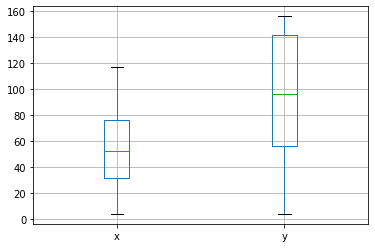

In [24]:
ruspini_df.boxplot()

### Question 1.2

> We have five lists conatining nutrient levels

> As we can see from the boxplot and the description, 

>> Energy, is the one that is more variable, so that every food could has a very different value

>> Protein, has very concentrated values, it has an outlier (7).

>> Fat, has very concentrated values, no outliers.

>> Calcium, has very concentrated values, several outliers

>> Iron, is the one that has the most concentrated values,with one outlier


In [35]:
food_df.describe()

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


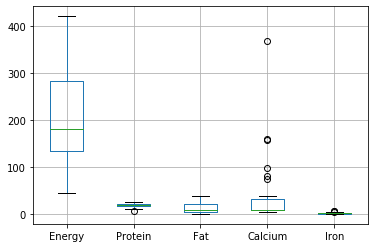

In [36]:
food_df.boxplot()

### Question 2

> We can say that there's a visible division. We would divide it into 4 partitions.

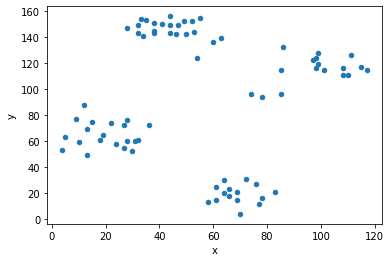

In [27]:
ruspini_df.plot.scatter(x='x', y='y')

### Question 3

> We can see that for a small amount of clusters (<6) KMeans is robust since it delivers the same results after more than 10 repetitions, but, for 6 clusters, we start to see that the number of repetitions affect since the centers move and thus the resulting partitions are not reliable

In [38]:
rusini_X = ruspini_df.to_numpy()

In [198]:
def runKmeans(X, n_clusters, plot=True, random_state=None):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    if plot:
        plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    return silhouette_score(X, labels=kmeans.labels_)

0.5827264208152947

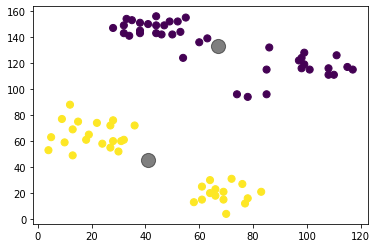

In [199]:
runKmeans(rusini_X, 2)

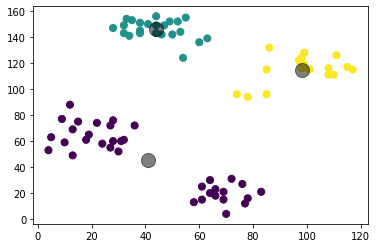

In [119]:
runKmeans(rusini_X, 3)

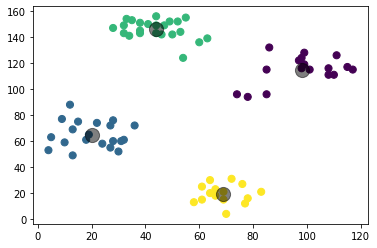

In [125]:
runKmeans(rusini_X, 4)

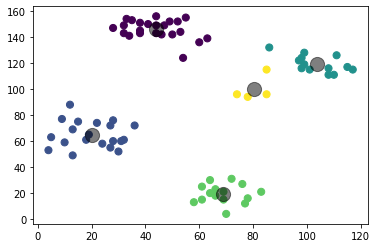

In [146]:
runKmeans(rusini_X, 5)

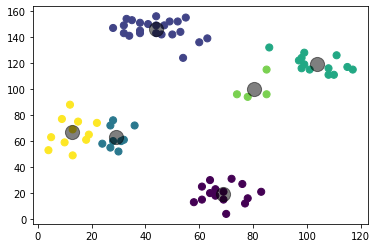

In [161]:
runKmeans(rusini_X, 6)

### Question 4

> By initializing the random state, let this part to be deterministic and thus expect same result each time, and the centers are initialized in the same spot each iteration

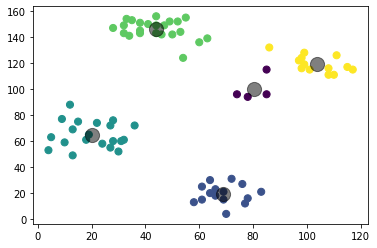

In [189]:
X = rusini_X
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Question 5

> So we see that the silhouette score shows us a increasing value that descreses after 5 components whiche make us think that thte best number of clusters is 4

In [190]:
labels = kmeans.labels_

In [191]:
silhouette_score(X, labels)

0.7019241413569157

In [224]:
scores = np.array([])
n = np.array([])

In [225]:
for i in range(2, 11):
    scores = np.append(scores, runKmeans(X, i, False, 0)) #= runKmeans(X, i, False, 0)
    n = np.append(n, i)

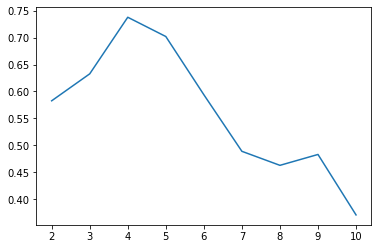

In [232]:
sns.lineplot(x=n, y=scores)

### Question 7

> We tried to visualize the data but it turned to be difficult since we have 5 dimensions and just with a visual inspection to the initial plots we don't see any clear partitioning. So, we calculated directly the silhouette score and obtained that the best number of clusters was 3

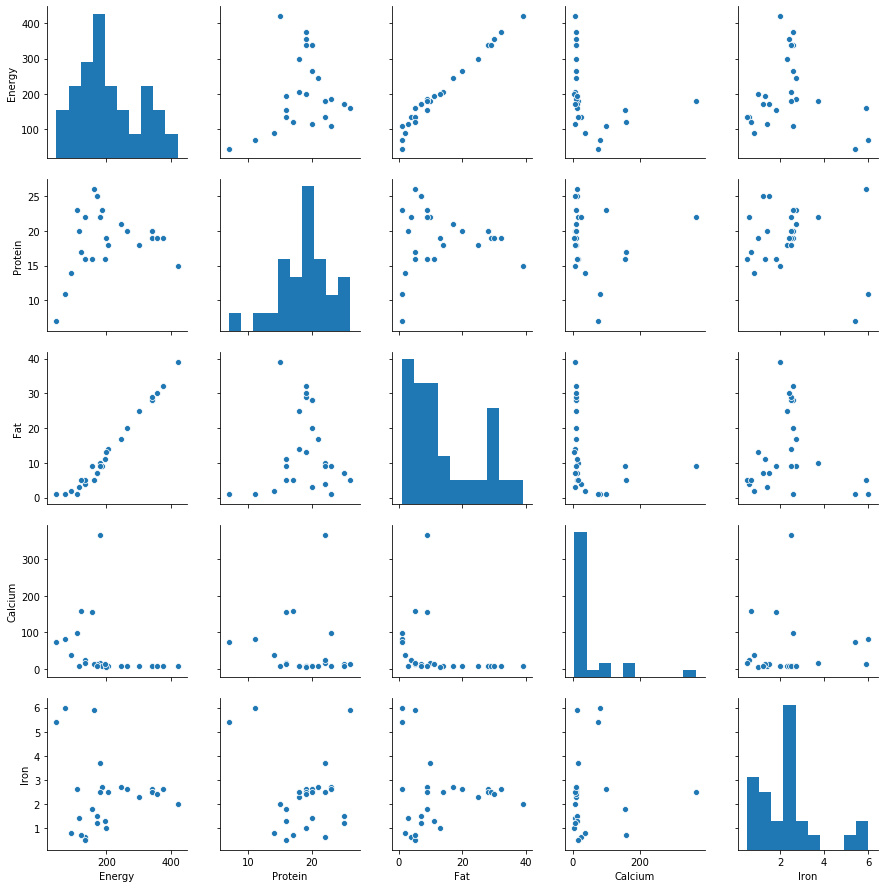

In [235]:
sns.pairplot(food_df)

In [243]:
food_X = food_df.to_numpy()

In [239]:
X = food_X
scores = np.array([])
n = np.array([])
for i in range(2, 11):
    scores = np.append(scores, runKmeans(X, i, False, 0)) #= runKmeans(X, i, False, 0)
    n = np.append(n, i)

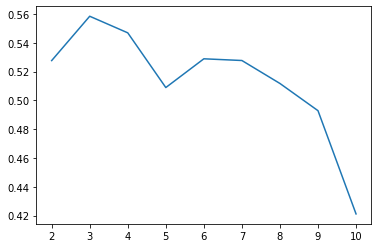

In [240]:
sns.lineplot(x=n, y=scores)

### Question 8

> From the cofiguration proposed (euclidean distance, 'complete' method) we obtain that if we respect the 3 clusters calculated before, we would obtain a separation between pork and beef meat as a first group, clams as a second, and seafood, chicken and two beef meats (of 15 elements in the group) as a third.

In [244]:
food_scaled = preprocessing.scale(food_X)

In [251]:
from scipy.cluster.hierarchy import dendrogram, linkage

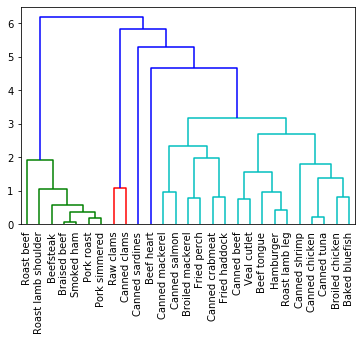

In [271]:
#hierarchical =AgglomerativeClustering(n_clusters=3).fit_predict(food_scaled)
Z = linkage(food_scaled, 'complete', metric='euclidean')
plt.figure()
dn = dendrogram(Z, labels=food_df.index, leaf_rotation=90)

### Question 9

> Since we know that Jaccard method fit for binary values, and Hamming has a similar result both woudl work for that type of data, but in our case it results confusing since the dendrogram is not readable.
> the results 

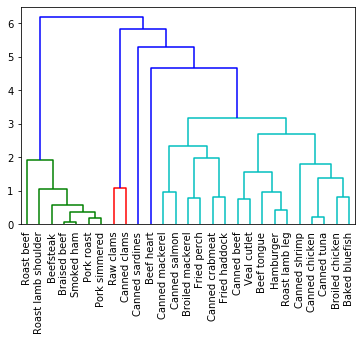

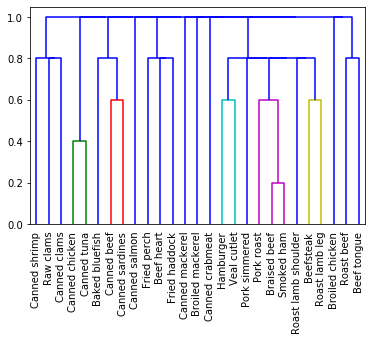

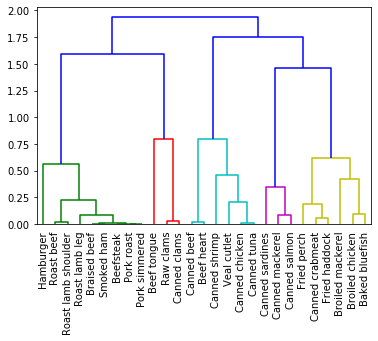

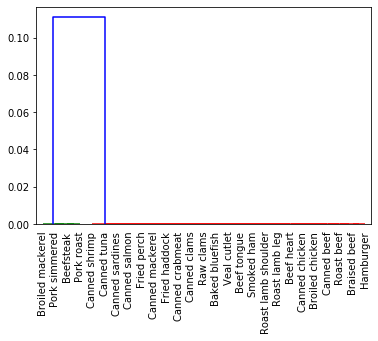

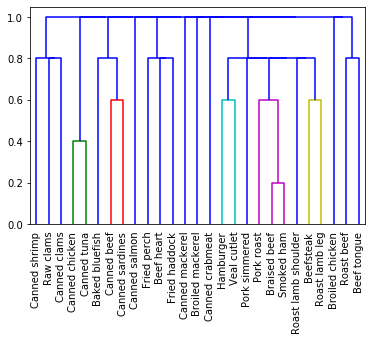

In [281]:
"""‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule"""
distances = ['euclidean', 'jaccard', 'cosine', 'dice', 'hamming']
for i, dist in enumerate(distances):
    plt.figure()
    dn = dendrogram( linkage(food_scaled, 'complete', metric=dist), labels=food_df.index, leaf_rotation=90)

,Energy,Protein,Fat,Calcium,Iron
Name,,,,,
Braised beef,340,20,28,9,2.6
Hamburger,245,21,17,9,2.7
Roast beef,420,15,39,7,2.0
Beefsteak,375,19,32,9,2.6
Canned beef,180,22,10,17,3.7
Broiled chicken,115,20,3,8,1.4
Canned chicken,170,25,7,12,1.5
Beef heart,160,26,5,14,5.9
Roast lamb leg,265,20,20,9,2.6
